# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [10]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.52e-06
Time:                        16:55:42   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

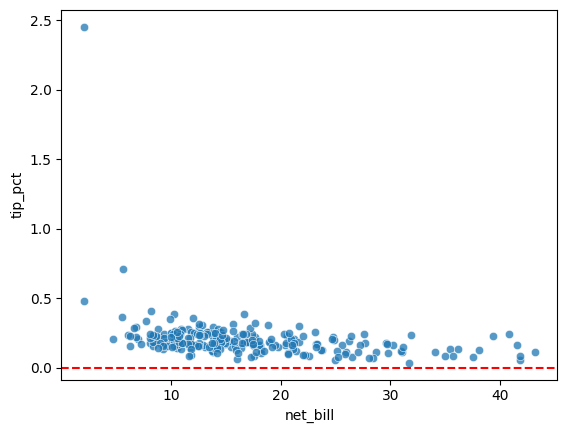

In [26]:
modelo = smf.ols('tip_pct ~ net_bill', data = tips).fit()
tips['modelo_original'] = modelo.resid
print(modelo.summary())

sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)
plt.axhline(y = 0, 
            color = 'r',
            linestyle = '--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     60.24
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.35e-13
Time:                        17:14:25   Log-Likelihood:                 123.44
No. Observations:                 244   AIC:                            -242.9
Df Residuals:                     242   BIC:                            -235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.62

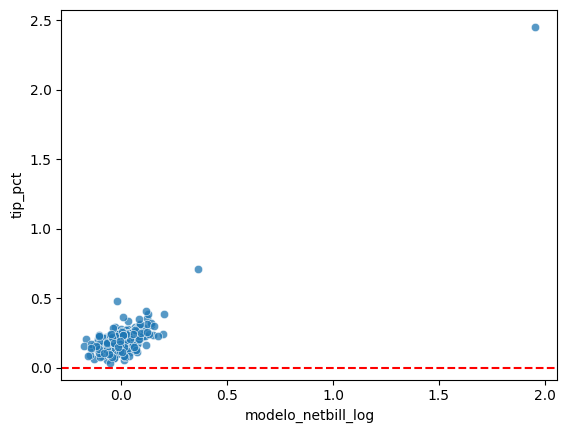

In [36]:
modelo_1 = smf.ols('tip_pct ~ np.log(net_bill+.1)', 
                 data = tips).fit()
tips['modelo_netbill_log'] = modelo_1.resid
print(modelo_1.summary())

sns.scatterplot(x = 'modelo_netbill_log', y = 'tip_pct', data = tips, alpha = .75)
plt.axhline(y = 0, 
            color = 'r',
            linestyle = '--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.06e-09
Time:                        17:14:40   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

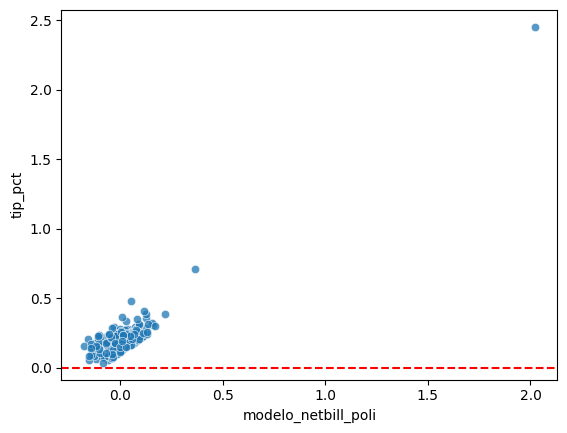

In [38]:
modelo_2 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)',
                 data = tips).fit()
tips['modelo_netbill_poli'] = modelo_2.resid
print(modelo_2.summary())

sns.scatterplot(x = 'modelo_netbill_poli', y = 'tip_pct', data = tips, alpha = .75)
plt.axhline(y = 0, 
            color = 'r',
            linestyle = '--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                             OLS Regression Results                            
Dep. Variable:     np.log(tip_pct + 1)   R-squared:                       0.145
Model:                             OLS   Adj. R-squared:                  0.141
Method:                  Least Squares   F-statistic:                     40.95
Date:                 Thu, 01 May 2025   Prob (F-statistic):           8.01e-10
Time:                         17:15:22   Log-Likelihood:                 256.78
No. Observations:                  244   AIC:                            -509.6
Df Residuals:                      242   BIC:                            -502.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2516      0.013     19.96

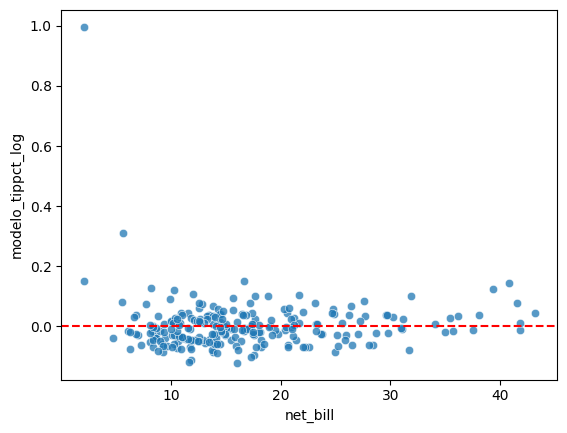

In [40]:
modelo_3 = smf.ols('np.log(tip_pct + 1) ~ net_bill',
                 data = tips).fit()
tips['modelo_tippct_log'] = modelo_3.resid
print(modelo_3.summary())

sns.scatterplot(x = 'net_bill', y = 'modelo_tippct_log', data = tips, alpha = .75)
plt.axhline(y = 0, 
            color = 'r',
            linestyle = '--')

In [44]:
tips['pred'] = modelo_3.fittedvalues
r_2 = tips[['pred', 'tip_pct']].corr().iloc[0,1]**2
r_2

0.09129084920662962

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 01 May 2025   Prob (F-statistic):           5.20e-20
Time:                        18:01:16   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

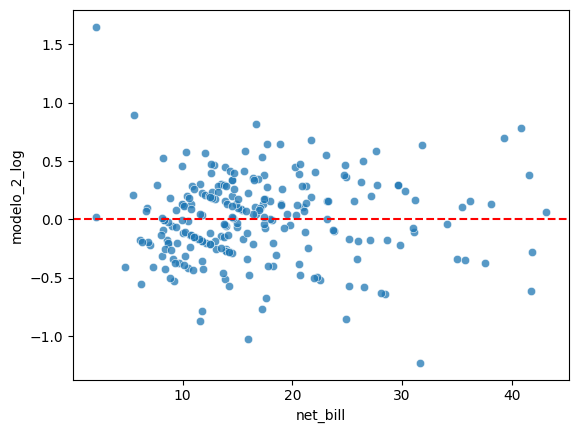

In [46]:
modelo_4 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)',
                 data = tips).fit()
tips['modelo_2_log'] = modelo_4.resid
print(modelo_4.summary())

sns.scatterplot(x = 'net_bill', y = 'modelo_2_log', data = tips, alpha = .75)
plt.axhline(y = 0, 
            color = 'r',
            linestyle = '--')

In [50]:
tips['2_log'] = modelo_4.fittedvalues
r_2log = tips[['2_log', 'tip_pct']].corr().iloc[0,1]**2
r_2log

0.20172884237605496

###  6. qual modelo resultou no melhor ajuste?

The 'model 4' model seems to be the most appropriate, as the data has:

1) no evident pattern,
2) uniform variance,
3) independent aspect,
4) slight improvement in R².